In [1]:
import pandas as pd

df = pd.read_csv('films_vn_with_content.csv')
df.set_index('Thứ Hạng', inplace=True)
df.head()

,Unnamed: 0,Phim,Link,Đạo diễn,Doanh thu (tỷ VNĐ),Diễn viên,Năm,Content
Thứ Hạng,,,,,,,,
1,0,Mưa đỏ,https://vi.wikipedia.org/wiki/M%C6%B0a_%C4%91%...,Đặng Thái Huyền,552,"Đỗ Nhật Hoàng, Lê Hạ Anh, Steven Nguyễn, Phươn...",2025,Bộ phim kể về cuộc chiến đấu bảo vệ Thành cổ Q...
2,1,Mai,https://vi.wikipedia.org/wiki/Mai_(phim),Trấn Thành,551,Phương Anh Đào,2024,Mai là một cô gái sinh ra trong một gia đình b...
3,2,Lật mặt 7: Một điều ước,https://vi.wikipedia.org/wiki/L%E1%BA%ADt_m%E1...,Lý Hải,483,Thanh Hiền,2024,"Phim kể về cuộc sống của bà Hai, một bà lão 73..."
4,3,Nhà bà Nữ,https://vi.wikipedia.org/wiki/Nh%C3%A0_b%C3%A0...,Trấn Thành,475,"Trấn Thành, Khả Như,",2023,Bộ phim xoay quanh gia đình ba thế hệ của bà N...
5,4,Bố già,https://vi.wikipedia.org/wiki/B%E1%BB%91_gi%C3...,Trấn Thành,427,"Trấn Thành, NSND Ngọc Giàu, Tuấn Trần, Ngân Ch...",2021,"Tại một xóm lao động nghèo tại Sài Gòn, có bốn..."


In [5]:
#read stopwords from file
with open('vietnamese-stopwords.txt', 'r', encoding='utf-8') as f:
        stopwords = f.read().splitlines()
    

In [8]:
len(stopwords)

1942

In [11]:
from underthesea import word_tokenize

text = "Việt Nam là đất nước rất đẹp."
tokens = word_tokenize(text)
print(tokens)
# Output: "Việt_Nam là đất_nước rất đẹp ."


d:\Miniconda\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


['Việt Nam', 'là', 'đất nước', 'rất', 'đẹp', '.']


In [4]:
docs = [
    "Mario racing  karts",
    "Zelda adventure  open world",
    "FIFA is a  football sports game"
]

In [6]:
import nltk
#nltk.download('punkt')
import re
from nltk.stem.snowball import SnowballStemmer
#nltk.download('punkt')

In [22]:
def tokenize_and_stem(text):
    
    # 1. Tokenize by sentence, then by word
    tokens = [word for sent in nltk.sent_tokenize(text)  # Tách thành câu
              for word in nltk.word_tokenize(sent)]      # Với từng câu tách thành từ
    print(tokens)

    # 2. Filter out raw tokens to remove noise
    filtered_tokens = [token for token in tokens if re.search('[a-zA-Z]', token)]
    print(filtered_tokens)

    # 3. Stem the filtered_tokens
    stems = [stemmer.stem(word) for word in filtered_tokens]
    print(stems)

    return stems


In [23]:
text = "Việt Nam là đất nước rất đẹp."
print(tokenize_and_stem(text))

['Việt', 'Nam', 'là', 'đất', 'nước', 'rất', 'đẹp', '.']
['Việt', 'Nam', 'là', 'đất', 'nước', 'rất', 'đẹp']
['việt', 'nam', 'là', 'đất', 'nước', 'rất', 'đẹp']
['việt', 'nam', 'là', 'đất', 'nước', 'rất', 'đẹp']


In [39]:
def tokenize_and_stem(text):
    # Tokenize by words
    tokens = [word for word in word_tokenize(text)]
    filtered_tokens = []
    # Filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    # Stem the filtered tokens
    stemmer = SnowballStemmer("english")
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems

In [40]:
tokenize_and_stem("Việt Nam là đất nước rất đẹp.")


['việt nam', 'là', 'đất nước', 'rất', 'đẹp']

In [41]:
df.head()

,Unnamed: 0,Phim,Link,Đạo diễn,Doanh thu (tỷ VNĐ),Diễn viên,Năm,Content
Thứ Hạng,,,,,,,,
1,0,Mưa đỏ,https://vi.wikipedia.org/wiki/M%C6%B0a_%C4%91%...,Đặng Thái Huyền,552,"Đỗ Nhật Hoàng, Lê Hạ Anh, Steven Nguyễn, Phươn...",2025,Bộ phim kể về cuộc chiến đấu bảo vệ Thành cổ Q...
2,1,Mai,https://vi.wikipedia.org/wiki/Mai_(phim),Trấn Thành,551,Phương Anh Đào,2024,Mai là một cô gái sinh ra trong một gia đình b...
3,2,Lật mặt 7: Một điều ước,https://vi.wikipedia.org/wiki/L%E1%BA%ADt_m%E1...,Lý Hải,483,Thanh Hiền,2024,"Phim kể về cuộc sống của bà Hai, một bà lão 73..."
4,3,Nhà bà Nữ,https://vi.wikipedia.org/wiki/Nh%C3%A0_b%C3%A0...,Trấn Thành,475,"Trấn Thành, Khả Như,",2023,Bộ phim xoay quanh gia đình ba thế hệ của bà N...
5,4,Bố già,https://vi.wikipedia.org/wiki/B%E1%BB%91_gi%C3...,Trấn Thành,427,"Trấn Thành, NSND Ngọc Giàu, Tuấn Trần, Ngân Ch...",2021,"Tại một xóm lao động nghèo tại Sài Gòn, có bốn..."


In [42]:
print(df['Content'].dtype)


object


In [43]:
df['Content'] = df['Content'].astype('str')

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate TfidfVectorizer object with stopwords and tokenizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=200000,
                                 min_df=0.2, stop_words=stopwords,
                                 use_idf=True, tokenizer=tokenize_and_stem,
                                 ngram_range=(1,3))

# Fit and transform the tfidf_vectorizer
tfidf_matrix = tfidf_vectorizer.fit_transform([x for x in df['Content']])

d:\Miniconda\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
d:\Miniconda\Lib\site-packages\sklearn\feature_extraction\text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['a', 'bao', 'bay', 'biến', 'bâi', 'bây bẩi', 'bấi', 'bất', 'bất thình', 'bất ý', 'bấy chầi', 'bập', 'bội', 'bởi vậi', 'chao', 'chi', 'chui', 'chà', 'chành', 'chí', 'chót', 'chùn', 'chăn', 'chũn', 'chưng', 'chạnh', 'chả', 'chầm', 'chập', 'chắn', 'chẳng', 'chết', 'chốc', 'chừ', 'chừng', 'chừng nào', 'coi', 'cu', 'câi', 'câu', 'cóc', 'cạnh', 'cảm thấi', 'cật', 'cắt', 'cổ', 'cục', 'cực', 'da', 'do vậi', 'dà', 'dĩ', 'dần', 'dầu', 'dở', 'giờ đâi', 'giời', 'gâi', 'ha', 'hãi', 'hèn', 'hô', 'hầu', 'hậu', 'hẳn', 'hồ', 'hự', 'khói', 'khô', 'kê', 'kìa', 'lai', 'le', 'loạt', 'luật', 'luốt', 'lình', 'lí', 'lô', 'lý', 'lấi', 'lẽ', 'lị', 'l

In [45]:
type(tfidf_matrix)

scipy.sparse._csr.csr_matrix

In [46]:
tfidf_vectorizer.get_feature_names_out()

array(['bao gồm', 'biến', 'buộc', 'bé', 'bí mật', 'bảo vệ', 'bắn', 'bắt',
       'bị thương', 'bọn', 'chiến đấu', 'chại', 'chết', 'chống',
       'cuộc sống', 'câu chuyện', 'cũ', 'cảnh', 'cố gắng', 'cứu', 'diễn',
       'gia đình', 'giúp', 'giúp đỡ', 'giải cứu', 'giết', 'giết chết',
       'gái', 'gâi', 'gọi', 'hai', 'hóa', 'hôm', 'hắn', 'hủi', 'khu',
       'kẻ', 'kế hoạch', 'lấi', 'mái', 'mặc dù', 'mẹ', 'mời', 'ngài',
       'nài', 'phim', 'phá', 'phát hiện', 'quyết định', 'ra lệnh', 'rơi',
       'rời', 'sống', 'ta', 'tham gia', 'thay', 'thoát', 'thuyết phục',
       'thành', 'thăm', 'thấi', 'tiêu diệt', 'tiết lộ', 'tiền', 'trai',
       'trận', 'trốn', 'trốn thoát', 'trở', 'trở lại', 'tàu', 'tấn công',
       'tổ chức', 'từ chối', 'vô tình', 'vụ', 'xải', 'đi', 'đâi', 'đường',
       'đầu', 'đổi', 'đứa', 'đứng'], dtype=object)

In [47]:
# pandas of tfidf_matrix
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), index=df['Phim'], columns=tfidf_vectorizer.get_feature_names_out())
tfidf_df.head()

,bao gồm,biến,buộc,bé,bí mật,bảo vệ,bắn,bắt,bị thương,bọn,...,vô tình,vụ,xải,đi,đâi,đường,đầu,đổi,đứa,đứng
Phim,,,,,,,,,,,,,,,,,,,,,
Mưa đỏ,0.0,0.0,0.000000,0.000000,0.0,0.246318,0.0,0.000000,0.116415,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.100331,0.000000,0.000000,0.0,0.000000,0.000000
Mai,0.0,0.0,0.000000,0.000000,0.0,0.109416,0.0,0.000000,0.000000,0.000000,...,0.091223,0.100704,0.103424,0.244808,0.178270,0.000000,0.000000,0.0,0.000000,0.000000
Lật mặt 7: Một điều ước,0.0,0.0,0.050336,0.121769,0.0,0.000000,0.0,0.000000,0.050336,0.000000,...,0.044397,0.000000,0.000000,0.208504,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
Nhà bà Nữ,0.0,0.0,0.000000,0.061119,0.0,0.080185,0.0,0.058588,0.000000,0.000000,...,0.000000,0.000000,0.075794,0.269109,0.000000,0.133704,0.000000,0.0,0.369002,0.000000
Bố già,0.0,0.0,0.061662,0.049723,0.0,0.000000,0.0,0.000000,0.061662,0.067216,...,0.054387,0.060040,0.000000,0.182443,0.106285,0.000000,0.058511,0.0,0.000000,0.067216


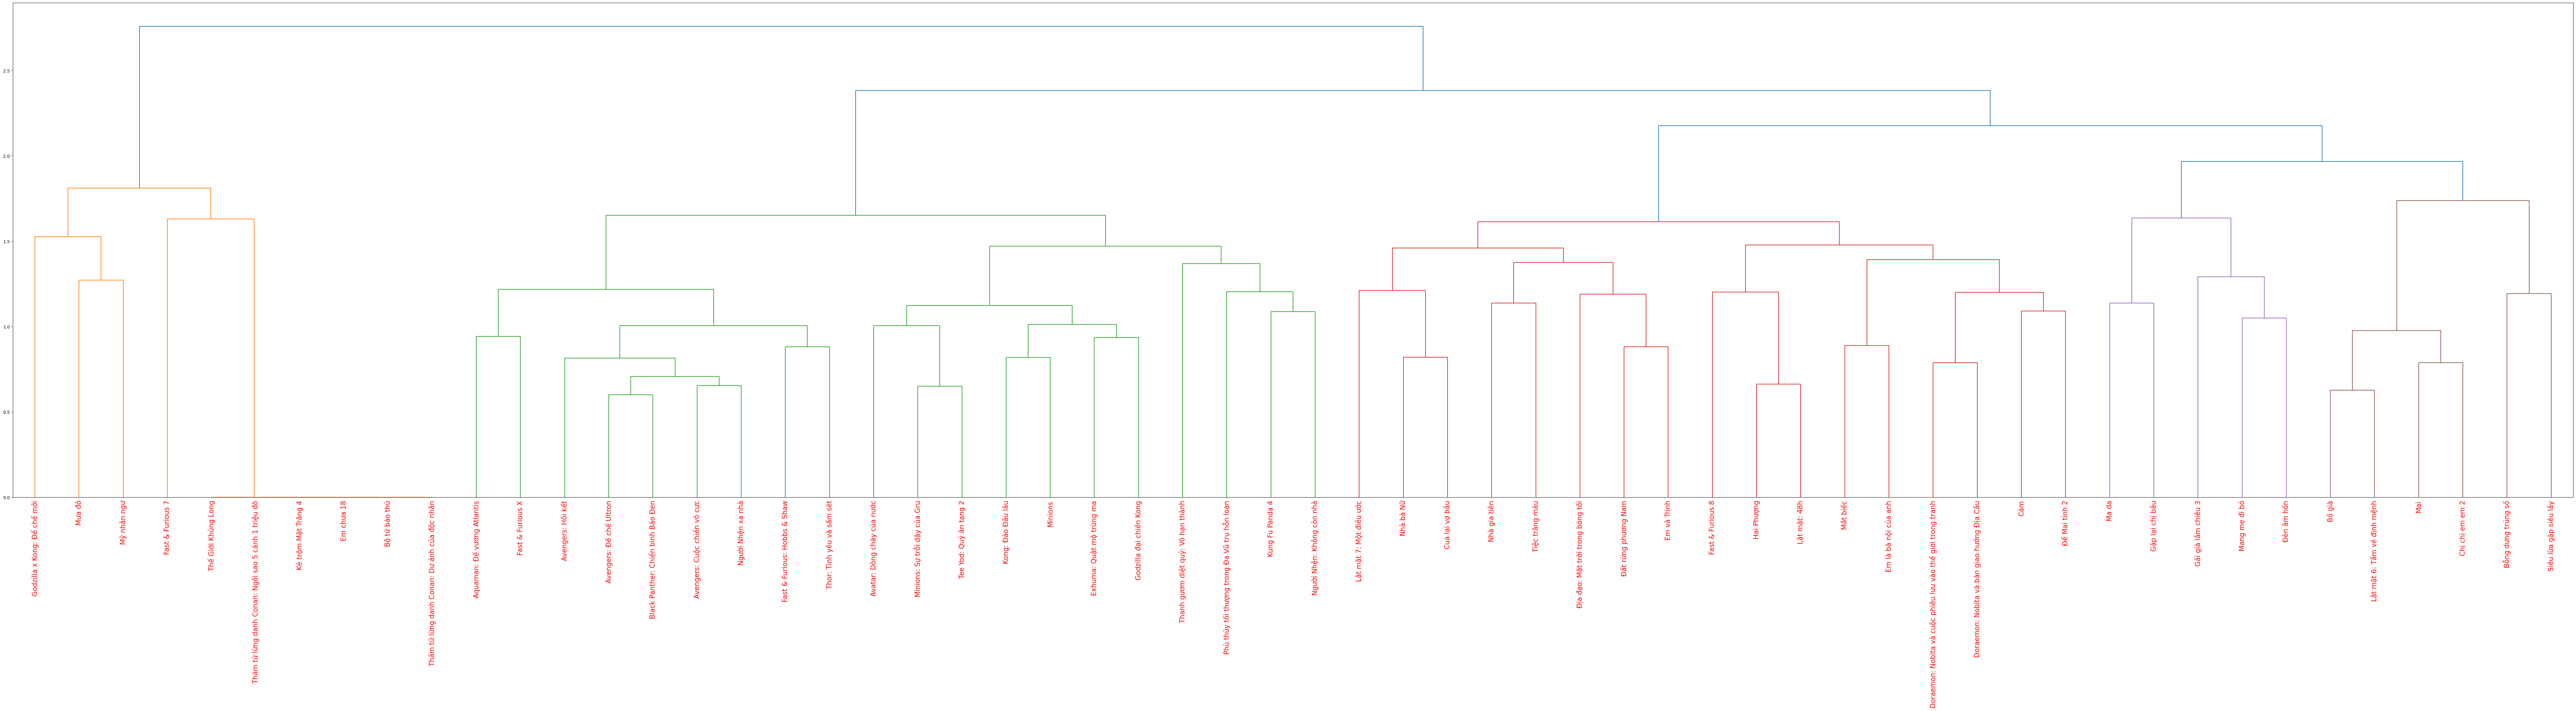

In [49]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Calculate the similarity distance
# 3 x 370
similarity_distance = 1 - cosine_similarity(tfidf_matrix)

# Create mergings matrix 
mergings = linkage(similarity_distance, method='complete')

# ===================================================================Plot the dendrogram, using title as label column
dendrogram_ = dendrogram(mergings,
               labels=[x for x in df['Phim']],
               leaf_rotation=90,
               leaf_font_size=16,
)

# Adjust the plot
fig = plt.gcf()
_ = [lbl.set_color('r') for lbl in plt.gca().get_xmajorticklabels()]
fig.set_size_inches(108, 21)

plt.savefig('dendo.png', dpi=100)
plt.show()

In [50]:
type(tfidf_matrix)

scipy.sparse._csr.csr_matrix

In [51]:
from sklearn.cluster import KMeans
num_clusters = 9
km = KMeans(n_clusters=num_clusters)
km.fit(tfidf_matrix)
clusters = km.labels_.tolist()
df["cluster"] = clusters
df['cluster'].value_counts() 

d:\Miniconda\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "d:\Miniconda\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "d:\Miniconda\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\Miniconda\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "d:\Miniconda\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^

cluster
4    29
7     7
3     6
2     5
5     3
6     3
1     2
8     2
0     1
Name: count, dtype: int64

In [52]:
df.head(10)

,Unnamed: 0,Phim,Link,Đạo diễn,Doanh thu (tỷ VNĐ),Diễn viên,Năm,Content,cluster
Thứ Hạng,,,,,,,,,
1,0,Mưa đỏ,https://vi.wikipedia.org/wiki/M%C6%B0a_%C4%91%...,Đặng Thái Huyền,552,"Đỗ Nhật Hoàng, Lê Hạ Anh, Steven Nguyễn, Phươn...",2025,Bộ phim kể về cuộc chiến đấu bảo vệ Thành cổ Q...,4
2,1,Mai,https://vi.wikipedia.org/wiki/Mai_(phim),Trấn Thành,551,Phương Anh Đào,2024,Mai là một cô gái sinh ra trong một gia đình b...,2
3,2,Lật mặt 7: Một điều ước,https://vi.wikipedia.org/wiki/L%E1%BA%ADt_m%E1...,Lý Hải,483,Thanh Hiền,2024,"Phim kể về cuộc sống của bà Hai, một bà lão 73...",4
4,3,Nhà bà Nữ,https://vi.wikipedia.org/wiki/Nh%C3%A0_b%C3%A0...,Trấn Thành,475,"Trấn Thành, Khả Như,",2023,Bộ phim xoay quanh gia đình ba thế hệ của bà N...,4
5,4,Bố già,https://vi.wikipedia.org/wiki/B%E1%BB%91_gi%C3...,Trấn Thành,427,"Trấn Thành, NSND Ngọc Giàu, Tuấn Trần, Ngân Ch...",2021,"Tại một xóm lao động nghèo tại Sài Gòn, có bốn...",2
6,5,Bộ tứ báo thủ,https://vi.wikipedia.org/wiki/B%E1%BB%99_t%E1%...,Trấn Thành,332,Tiểu Vy,2025,nan,4
7,6,Avengers: Hồi kết,https://vi.wikipedia.org/wiki/Avengers:_H%E1%B...,Anthony Russo,280,Robert Downey Jr.,2019,Phim khởi đầu sau sự kiện Infinity War năm 201...,3
8,7,Avatar: Dòng chảy của nước,https://vi.wikipedia.org/wiki/Avatar:_D%C3%B2n...,James Cameron,278,Sam Worthington,2022,Hơn một thập kỷ sau khi người Na'vi đẩy lùi cu...,1
9,8,Lật mặt 6: Tấm vé định mệnh,https://vi.wikipedia.org/wiki/L%E1%BA%ADt_m%E1...,Lý Hải,273,"Lý Hải, Quốc Cường,",2023,Phim kể về tấm vé số có mệnh giá 10 ngàn đồng ...,2


In [53]:
ClusterOfPhimMai = df[df['Phim']=='Avengers: Hồi kết']['cluster'].values
ClusterOfPhimMai


array([3], dtype=int64)

In [54]:
#print any film in the same cluster as 'Mai'
phim_giong_mai = df[df['cluster']==ClusterOfPhimMai[0]] 

In [55]:
phim_giong_mai

,Unnamed: 0,Phim,Link,Đạo diễn,Doanh thu (tỷ VNĐ),Diễn viên,Năm,Content,cluster
Thứ Hạng,,,,,,,,,
7,6,Avengers: Hồi kết,https://vi.wikipedia.org/wiki/Avengers:_H%E1%B...,Anthony Russo,280,Robert Downey Jr.,2019,Phim khởi đầu sau sự kiện Infinity War năm 201...,3
19,15,Avengers: Cuộc chiến vô cực,https://vi.wikipedia.org/wiki/Avengers:_Cu%E1%...,Anthony Russo,189,"Robert Downey Jr., Chris Hemsworth, Mark Ruffa...",2018,"Sau khi lấy được Viên đá Sức mạnh, một trong s...",3
32,28,Fast & Furious: Hobbs & Shaw,https://vi.wikipedia.org/wiki/Fast_%26_Furious...,David Leitch,158,"Dwayne Johnson, Jason Statham,",2019,"Tại London, Hattie Shaw và đội đặc vụ MI6 cố g...",3
46,40,Avengers: Đế chế Ultron,https://vi.wikipedia.org/wiki/Avengers:_Age_of...,Joss Whedon,124,"Robert Downey Jr., Chris Evans, Chris Hemswort...",2015,"Nhân dịp Thor đến Trái Đất lần thứ ba, Biệt độ...",3
52,45,Người Nhện xa nhà,https://vi.wikipedia.org/wiki/Ng%C6%B0%E1%BB%9...,Jon Watts,117,"Tom Holland, Samuel L. Jackson,",2019,"Tại Ixtenco, Mexico, tám tháng sau sự kiện Đốm...",3
63,51,Black Panther: Chiến binh Báo Đen,https://vi.wikipedia.org/wiki/Black_Panther:_C...,Ryan Coogler,104,Chadwick Boseman,2018,"Từ nhiều thế kỉ trước, đã xảy ra cuộc chiến tr...",3


In [56]:
vals = df.Phim.to_list()
vals



['Mưa đỏ',
 'Mai',
 'Lật mặt 7: Một điều ước',
 'Nhà bà Nữ',
 'Bố già',
 'Bộ tứ báo thủ',
 'Avengers: Hồi kết',
 'Avatar: Dòng chảy của nước',
 'Lật mặt 6: Tấm vé định mệnh',
 'Nhà gia tiên',
 'Exhuma: Quật mộ trùng ma',
 'Phù thủy tối thượng trong Đa Vũ trụ hỗn loạn',
 'Minions: Sự trỗi dậy của Gru',
 'Hai Phượng',
 'Cua lại vợ bầu',
 'Avengers: Cuộc chiến vô cực',
 'Bỗng dưng trúng số',
 'Mắt biếc',
 'Thám tử lừng danh Conan: Dư ảnh của độc nhãn',
 'Tiệc trăng máu',
 'Địa đạo: Mặt trời trong bóng tối',
 'Mang mẹ đi bỏ',
 'Em chưa 18',
 'Doraemon: Nobita và cuộc phiêu lưu vào thế giới trong tranh',
 'Kong: Đảo Đầu lâu',
 'Gái già lắm chiêu 3',
 'Fast & Furious 8',
 'Aquaman: Đế vương Atlantis',
 'Fast & Furious: Hobbs & Shaw',
 'Lật mặt: 48h',
 'Doraemon: Nobita và bản giao hưởng Địa Cầu',
 'Fast & Furious 7',
 'Godzilla x Kong: Đế chế mới',
 'Đất rừng phương Nam',
 'Godzilla đại chiến Kong',
 'Kẻ trộm Mặt Trăng 4',
 'Thanh gươm diệt quỷ: Vô hạn thành',
 'Kung Fu Panda 4',
 'Ma da',
 

In [57]:
similarity_distance

array([[ 0.00000000e+00,  8.59265364e-01,  8.66465766e-01, ...,
         9.08316472e-01,  6.94597516e-01,  7.99672985e-01],
       [ 8.59265364e-01, -2.22044605e-16,  5.83564573e-01, ...,
         8.02976855e-01,  8.10703679e-01,  8.10834752e-01],
       [ 8.66465766e-01,  5.83564573e-01, -2.22044605e-16, ...,
         7.12029119e-01,  8.61546820e-01,  7.80901445e-01],
       ...,
       [ 9.08316472e-01,  8.02976855e-01,  7.12029119e-01, ...,
        -2.22044605e-16,  6.79211389e-01,  6.48501195e-01],
       [ 6.94597516e-01,  8.10703679e-01,  8.61546820e-01, ...,
         6.79211389e-01, -2.22044605e-16,  4.31719624e-01],
       [ 7.99672985e-01,  8.10834752e-01,  7.80901445e-01, ...,
         6.48501195e-01,  4.31719624e-01,  0.00000000e+00]])

In [58]:
similarity_df = pd.DataFrame(similarity_distance, columns=vals, index=vals)

similarity_df.head()

,Mưa đỏ,Mai,Lật mặt 7: Một điều ước,Nhà bà Nữ,Bố già,Bộ tứ báo thủ,Avengers: Hồi kết,Avatar: Dòng chảy của nước,Lật mặt 6: Tấm vé định mệnh,Nhà gia tiên,...,Mỹ nhân ngư,Thế Giới Khủng Long,Gặp lại chị bầu,Black Panther: Chiến binh Báo Đen,Em là bà nội của anh,Để Mai tính 2,Em và Trịnh,Fast & Furious X,Tee Yod: Quỷ ăn tạng 2,Minions
Mưa đỏ,0.000000,8.592654e-01,8.664658e-01,8.775414e-01,9.305432e-01,1.0,0.814954,0.847727,0.935374,0.774074,...,0.740576,1.0,0.975539,0.923399,0.904892,0.857536,0.897393,0.908316,0.694598,0.799673
Mai,0.859265,-2.220446e-16,5.835646e-01,5.208550e-01,3.518817e-01,1.0,0.789665,0.748540,0.339354,0.633850,...,0.722542,1.0,0.734353,0.780770,0.659974,0.591975,0.534122,0.802977,0.810704,0.810835
Lật mặt 7: Một điều ước,0.866466,5.835646e-01,-2.220446e-16,3.795949e-01,6.910400e-01,1.0,0.805531,0.756692,0.744881,0.581351,...,0.888822,1.0,0.798009,0.861604,0.716221,0.687852,0.560383,0.712029,0.861547,0.780901
Nhà bà Nữ,0.877541,5.208550e-01,3.795949e-01,-2.220446e-16,7.268744e-01,1.0,0.753421,0.615299,0.787552,0.672029,...,0.873854,1.0,0.854559,0.800760,0.649474,0.625220,0.459443,0.798637,0.774129,0.740285
Bố già,0.930543,3.518817e-01,6.910400e-01,7.268744e-01,-2.220446e-16,1.0,0.801403,0.544187,0.225627,0.736102,...,0.814995,1.0,0.816181,0.795763,0.754815,0.653611,0.737867,0.750589,0.629805,0.695868


In [59]:
similarity_df

,Mưa đỏ,Mai,Lật mặt 7: Một điều ước,Nhà bà Nữ,Bố già,Bộ tứ báo thủ,Avengers: Hồi kết,Avatar: Dòng chảy của nước,Lật mặt 6: Tấm vé định mệnh,Nhà gia tiên,...,Mỹ nhân ngư,Thế Giới Khủng Long,Gặp lại chị bầu,Black Panther: Chiến binh Báo Đen,Em là bà nội của anh,Để Mai tính 2,Em và Trịnh,Fast & Furious X,Tee Yod: Quỷ ăn tạng 2,Minions
Mưa đỏ,0.000000,8.592654e-01,8.664658e-01,8.775414e-01,9.305432e-01,1.0,8.149537e-01,8.477275e-01,9.353736e-01,0.774074,...,7.405755e-01,1.0,9.755387e-01,9.233991e-01,9.048922e-01,8.575357e-01,8.973928e-01,9.083165e-01,6.945975e-01,0.799673
Mai,0.859265,-2.220446e-16,5.835646e-01,5.208550e-01,3.518817e-01,1.0,7.896647e-01,7.485399e-01,3.393536e-01,0.633850,...,7.225418e-01,1.0,7.343525e-01,7.807703e-01,6.599743e-01,5.919754e-01,5.341222e-01,8.029769e-01,8.107037e-01,0.810835
Lật mặt 7: Một điều ước,0.866466,5.835646e-01,-2.220446e-16,3.795949e-01,6.910400e-01,1.0,8.055308e-01,7.566915e-01,7.448814e-01,0.581351,...,8.888220e-01,1.0,7.980087e-01,8.616039e-01,7.162208e-01,6.878524e-01,5.603829e-01,7.120291e-01,8.615468e-01,0.780901
Nhà bà Nữ,0.877541,5.208550e-01,3.795949e-01,-2.220446e-16,7.268744e-01,1.0,7.534207e-01,6.152994e-01,7.875522e-01,0.672029,...,8.738538e-01,1.0,8.545594e-01,8.007599e-01,6.494745e-01,6.252198e-01,4.594432e-01,7.986366e-01,7.741286e-01,0.740285
Bố già,0.930543,3.518817e-01,6.910400e-01,7.268744e-01,-2.220446e-16,1.0,8.014029e-01,5.441867e-01,2.256269e-01,0.736102,...,8.149948e-01,1.0,8.161813e-01,7.957626e-01,7.548149e-01,6.536112e-01,7.378666e-01,7.505888e-01,6.298053e-01,0.695868
Bộ tứ báo thủ,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,...,1.000000e+00,1.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000
Avengers: Hồi kết,0.814954,7.896647e-01,8.055308e-01,7.534207e-01,8.014029e-01,1.0,-2.220446e-16,5.394290e-01,7.919854e-01,0.675277,...,8.201752e-01,1.0,9.050228e-01,3.590139e-01,7.316764e-01,5.825054e-01,7.675263e-01,5.404265e-01,6.706598e-01,0.723006
Avatar: Dòng chảy của nước,0.847727,7.485399e-01,7.566915e-01,6.152994e-01,5.441867e-01,1.0,5.394290e-01,1.110223e-16,7.891961e-01,0.721493,...,8.824944e-01,1.0,8.117968e-01,6.211851e-01,7.270643e-01,7.403331e-01,7.823324e-01,5.055659e-01,4.853708e-01,0.512523
Lật mặt 6: Tấm vé định mệnh,0.935374,3.393536e-01,7.448814e-01,7.875522e-01,2.256269e-01,1.0,7.919854e-01,7.891961e-01,-2.220446e-16,0.707799,...,8.279284e-01,1.0,9.131099e-01,8.447527e-01,7.745271e-01,6.372466e-01,7.360384e-01,8.455922e-01,6.973234e-01,0.751294
Nhà gia tiên,0.774074,6.338501e-01,5.813512e-01,6.720292e-01,7.361023e-01,1.0,6.752771e-01,7.214925e-01,7.077994e-01,0.000000,...,5.810913e-01,1.0,8.049697e-01,7.856984e-01,7.692128e-01,6.028935e-01,6.947623e-01,7.840770e-01,7.492447e-01,0.784068


In [60]:
similarity_df.to_csv('sim_matrix.csv')

In [77]:
Phim = 'Avengers: Hồi kết'
matches = similarity_df[Phim].sort_values()[1:9]
matches


Avengers: Cuộc chiến vô cực                                    0.308327
Avengers: Đế chế Ultron                                        0.321516
Black Panther: Chiến binh Báo Đen                              0.359014
Người Nhện xa nhà                                              0.361376
Thor: Tình yêu và sấm sét                                      0.459829
Doraemon: Nobita và cuộc phiêu lưu vào thế giới trong tranh    0.478241
Người Nhện: Không còn nhà                                      0.496656
Fast & Furious: Hobbs & Shaw                                   0.518035
Name: Avengers: Hồi kết, dtype: float64

In [74]:
matches = matches.index.tolist()

In [75]:
matches

['Avengers: Cuộc chiến vô cực',
 'Avengers: Đế chế Ultron',
 'Black Panther: Chiến binh Báo Đen',
 'Người Nhện xa nhà',
 'Thor: Tình yêu và sấm sét',
 'Doraemon: Nobita và cuộc phiêu lưu vào thế giới trong tranh',
 'Người Nhện: Không còn nhà',
 'Fast & Furious: Hobbs & Shaw']

In [76]:
df.set_index('Phim').loc[matches]

Unnamed: 0  \
Phim                                                                      
Avengers: Cuộc chiến vô cực                                          15   
Avengers: Đế chế Ultron                                              40   
Black Panther: Chiến binh Báo Đen                                    51   
Người Nhện xa nhà                                                    45   
Thor: Tình yêu và sấm sét                                            43   
Doraemon: Nobita và cuộc phiêu lưu vào thế giới trong tranh          23   
Người Nhện: Không còn nhà                                            39   
Fast & Furious: Hobbs & Shaw                                         28   

                                                                                                                                                                                              Link  \
Phim                                                                                                                                                                                                 
Avengers: Cuộc chiến vô cực                                                                                 https://vi.wikipedia.org/wiki/Avengers:_Cu%E1%BB%99c_chi%E1%BA%BFn_v%C3%B4_c%E1%BB%B1c   
Avengers: Đế chế Ultron                                                                                                                      https://vi.wikipedia.org/wiki/Avengers:_Age_of_Ultron   
Black Panther: Chiến binh Báo Đen                                                                                https://vi.wikipedia.org/wiki/Black_Panther:_Chi%E1%BA%BFn_binh_B%C3%A1o_%C4%90en   
Người Nhện xa nhà                                                                                                        https://vi.wikipedia.org/wiki/Ng%C6%B0%E1%BB%9Di_Nh%E1%BB%87n_xa_nh%C3%A0   
Thor: Tình yêu và sấm sét                                                                                      https://vi.wikipedia.org/wiki/Thor:_T%C3%ACnh_y%C3%AAu_v%C3%A0_s%E1%BA%A5m_s%C3%A9t   
Doraemon: Nobita và cuộc phiêu lưu vào thế giới trong tranh  https://vi.wikipedia.org/wiki/Doraemon:_Nobita_v%C3%A0_cu%E1%BB%99c_phi%C3%AAu_l%C6%B0u_v%C3%A0o_th%E1%BA%BF_gi%E1%BB%9Bi_trong_tranh   
Người Nhện: Không còn nhà                                                                              https://vi.wikipedia.org/wiki/Ng%C6%B0%E1%BB%9Di_Nh%E1%BB%87n:_Kh%C3%B4ng_c%C3%B2n_nh%C3%A0   
Fast & Furious: Hobbs & Shaw                                                                                                        https://vi.wikipedia.org/wiki/Fast_%26_Furious:_Hobbs_%26_Shaw   

                                                                    Đạo diễn  \
Phim                                                                           
Avengers: Cuộc chiến vô cực                                    Anthony Russo   
Avengers: Đế chế Ultron                                          Joss Whedon   
Black Panther: Chiến binh Báo Đen                               Ryan Coogler   
Người Nhện xa nhà                                                  Jon Watts   
Thor: Tình yêu và sấm sét                                      Taika Waititi   
Doraemon: Nobita và cuộc phiêu lưu vào thế giới trong tranh  Teramoto Yukiyo   
Người Nhện: Không còn nhà                                          Jon Watts   
Fast & Furious: Hobbs & Shaw                                    David Leitch   

                                                             Doanh thu (tỷ VNĐ)  \
Phim                                                                              
Avengers: Cuộc chiến vô cực                                                 189   
Avengers: Đế chế Ultron                                                     124   
Black Panther: Chiến binh Báo Đen                                           104   
Người Nhện xa nhà                                                           117   
Thor: Tình yêu và sấm sét     